# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_pickle('../dataset/feature engineering/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1421 non-null   datetime64[ns]
 1   priceidx          1421 non-null   float64       
 2   logreturn_idx     1421 non-null   float64       
 3   pricenyse         1421 non-null   float64       
 4   logreturn_nyse    1421 non-null   float64       
 5   usdidr            1421 non-null   float64       
 6   logreturn_usdidr  1421 non-null   float64       
 7   suku_bunga        1421 non-null   float64       
 8   diffsukubunga     1421 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.0 KB


# Statistik Deskriptif

In [6]:
df[[col for col in df.columns if col != 'date']].describe() #menampilkan statistik kecuali kolom date

,priceidx,logreturn_idx,pricenyse,logreturn_nyse,usdidr,logreturn_usdidr,suku_bunga,diffsukubunga
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,473.598086,-0.000156,16368.546735,0.000340,15165.190007,0.000105,4.694933,-0.000176
std,47.169055,0.013817,2535.123930,0.012334,829.177208,0.004097,1.274583,0.035726
min,311.880000,-0.092473,8777.379883,-0.125950,13572.500000,-0.027844,0.000000,-0.250000
25%,440.290000,-0.007022,14946.009766,-0.004628,14395.000000,-0.001366,3.500000,0.000000
50%,483.970000,0.000091,16143.950195,0.000362,15050.000000,0.000000,4.750000,0.000000
75%,504.380000,0.005989,18028.169922,0.005845,15805.000000,0.001883,5.750000,0.000000
max,583.110000,0.142235,21807.330078,0.095642,16870.000000,0.044659,6.250000,0.500000


In [26]:
#hitung range data
rangedata = []

for i in df.columns:
    if i != 'date':
        hitungrange = df[i].max() - df[i].min()
        jarak.append({
            'kolom' : i,
            'range' : hitungrange
        })

rangedata = pd.DataFrame.from_dict(jarak)

rangedata

,kolom,range
0,priceidx,271.230000
1,logreturn_idx,0.234708
2,pricenyse,13029.950195
3,logreturn_nyse,0.221592
4,usdidr,3297.500000
5,logreturn_usdidr,0.072503
6,suku_bunga,6.250000
7,diffsukubunga,0.750000


In [47]:
#hitung varians data
varians = []

for i in df.columns:
    if i != 'date':
        ratarata = df[i].mean()
        selisih = df[i] - ratarata
        kuadrat = selisih ** 2
        jumlah = kuadrat.sum()
        banyak = kuadrat.count()
        hasil = jumlah / (banyak-1)
        hasil = round(hasil, 4)
        print (f'varians pada data {i} adalah {hasil}')
        varians.append({
            'kolom' : i,
            'varians' : hasil
        })

data = pd.DataFrame(varians)
data

varians pada data priceidx adalah 2224.9198
varians pada data logreturn_idx adalah 0.0002
varians pada data pricenyse adalah 6426853.3405
varians pada data logreturn_nyse adalah 0.0002
varians pada data usdidr adalah 687534.8425
varians pada data logreturn_usdidr adalah 0.0
varians pada data suku_bunga adalah 1.6246
varians pada data diffsukubunga adalah 0.0013


,kolom,varians
0,priceidx,2.224920e+03
1,logreturn_idx,2.000000e-04
2,pricenyse,6.426853e+06
3,logreturn_nyse,2.000000e-04
4,usdidr,6.875348e+05
5,logreturn_usdidr,0.000000e+00
6,suku_bunga,1.624600e+00
7,diffsukubunga,1.300000e-03


In [52]:
skewness = df[[i for i in df.columns if i != 'date']].skew() #skewness
kurtosis = df[[j for j in df.columns if j != 'date']].kurt()
print('skewness data')
print(skewness)
print('=====================')
print('Kurtosis Data')
print(kurtosis)

skewness data
priceidx           -0.400891
logreturn_idx       0.180120
pricenyse           0.017763
logreturn_nyse     -1.040579
usdidr              0.205190
logreturn_usdidr    1.000867
suku_bunga         -1.055188
diffsukubunga       4.122729
dtype: float64
Kurtosis Data
priceidx             -0.418567
logreturn_idx        13.167611
pricenyse            -0.202769
logreturn_nyse       19.424667
usdidr               -1.122980
logreturn_usdidr     20.858339
suku_bunga            2.043877
diffsukubunga       107.295304
dtype: float64


# Korelasi Data

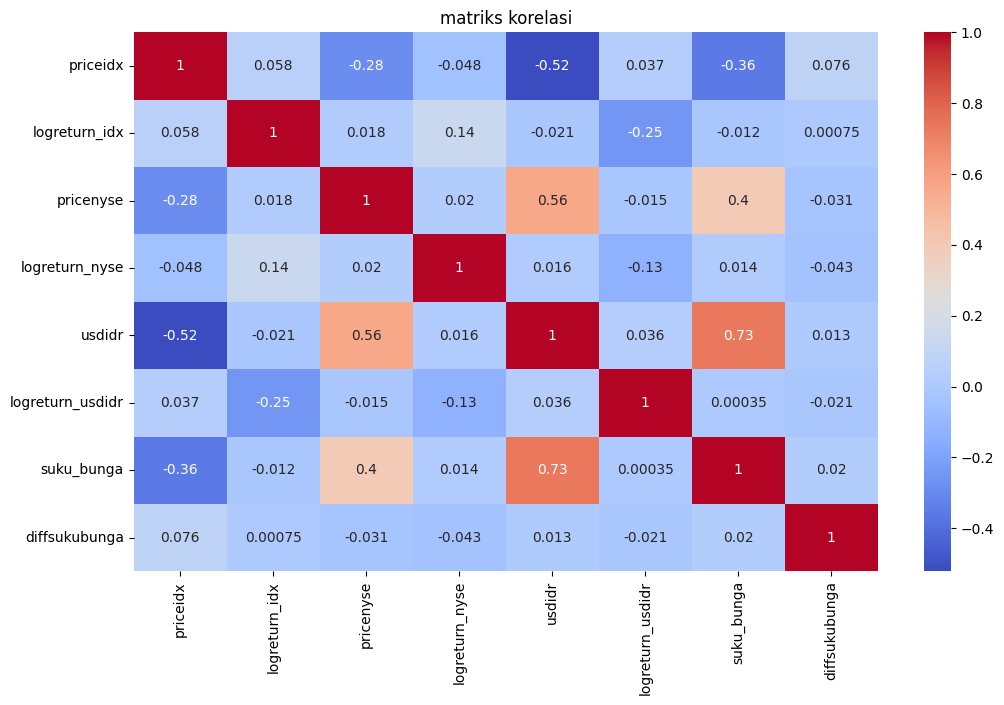

In [54]:
correlation_matrix = df[[i for i in df.columns if i != 'date']].corr(method='spearman')

plt.figure(figsize=(12,7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('matriks korelasi')
plt.show()

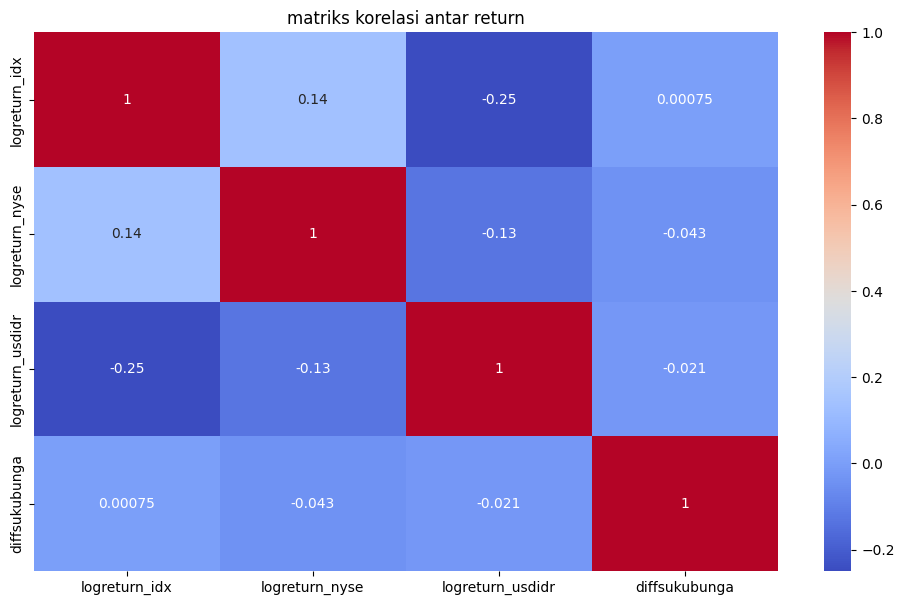

In [58]:
correlation_matrix = df[[i for i in df.columns if i.startswith('log') or i.startswith('diff')]].corr(method='spearman')

plt.figure(figsize=(12,7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('matriks korelasi antar return')
plt.show()

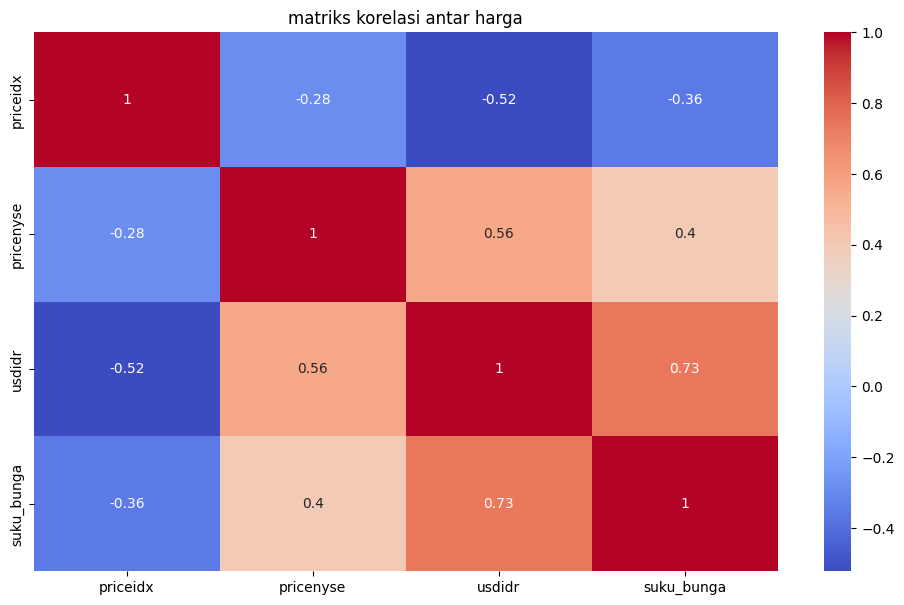

In [60]:
correlation_matrix = df[[i for i in df.columns if i.startswith('price') or i.startswith('usd') or i.startswith('suku')]].corr(method='spearman')

plt.figure(figsize=(12,7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('matriks korelasi antar harga')
plt.show()

# Visualisasi data

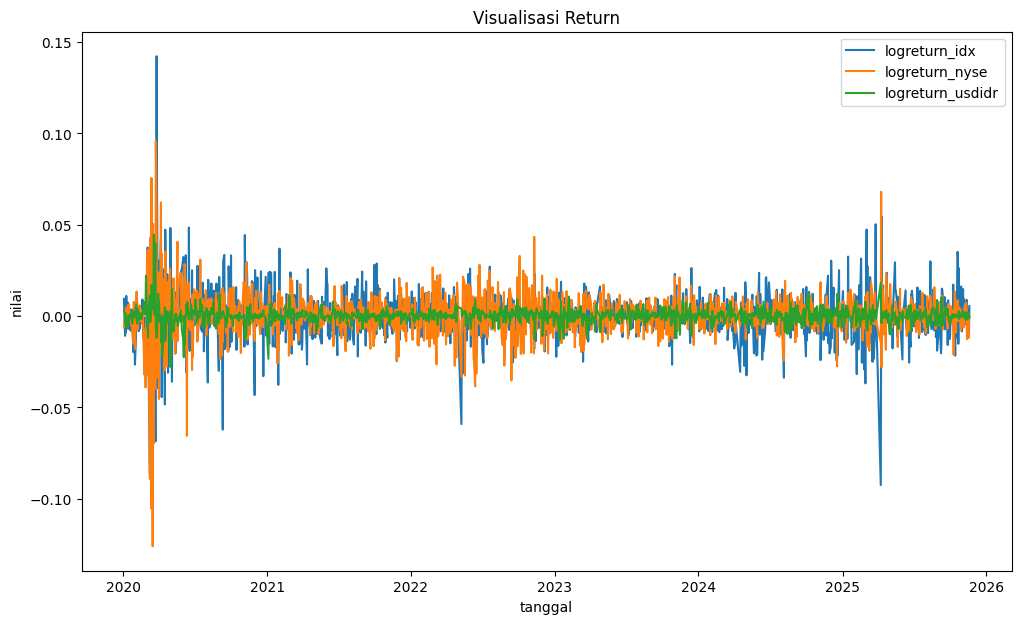

In [76]:
plt.figure(figsize=(12,7))

for i in df.columns:
    if i.startswith('log'):
        plt.plot(df['date'], df[i], label=i)
plt.xlabel('tanggal')
plt.ylabel('nilai')
plt.legend()
plt.title('Visualisasi Return')
plt.show()

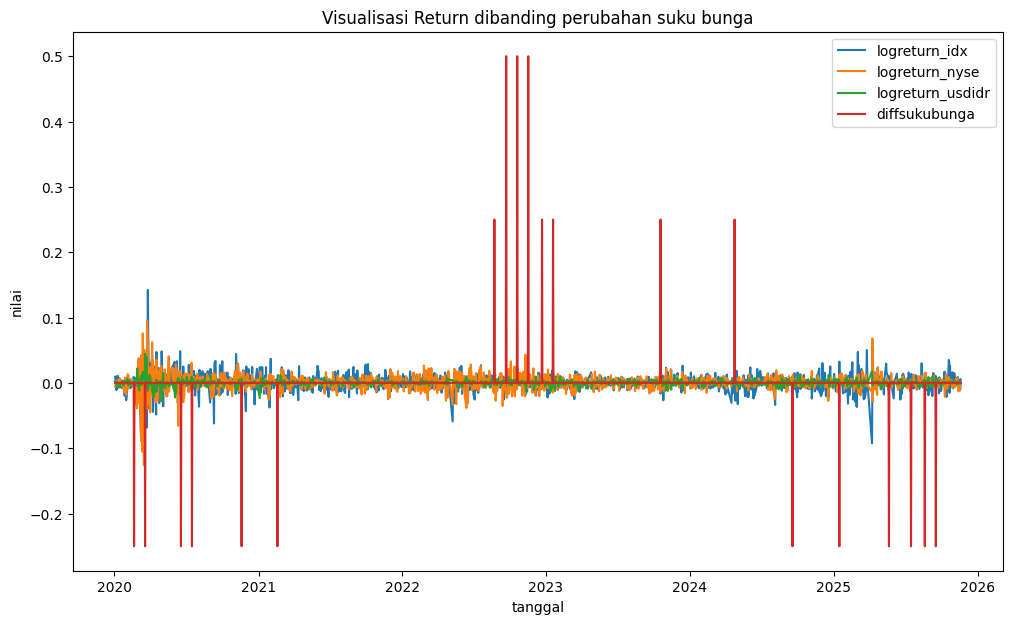

In [78]:
plt.figure(figsize=(12,7))

for i in df.columns:
    if i.startswith('log') or i.startswith('diff'):
        plt.plot(df['date'], df[i], label=i)
plt.xlabel('tanggal')
plt.ylabel('nilai')
plt.legend()
plt.title('Visualisasi Return dibanding perubahan suku bunga')
plt.show()